In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']


In [3]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

In [4]:
twenty_train.data[0:2]


['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

In [5]:
twenty_train.target_names


['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [6]:
len(twenty_train.data)


2257

In [7]:
# An example of what the subset contains
print("\n".join(twenty_train.data[0].split("\n")))

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



In [8]:
print(twenty_train.target_names[twenty_train.target[0]])


comp.graphics


In [9]:
twenty_train.target[0]


1

In [10]:
# category of first 10 documents.
twenty_train.target[0:10]


array([1, 1, 3, 3, 3, 3, 3, 2, 2, 2], dtype=int64)

In [11]:
for t in twenty_train.target[:10]:
    print(twenty_train.target_names[t])

comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med


In [12]:
#######EXERCISE 1
########ANSWER
for t in twenty_train.data[:3]:
    print(t)

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv

In [13]:
##3 data transformation

In [14]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [15]:
len(X)


2257

In [16]:
X[0:2]


text
0  From: sd345@city.ac.uk (Michael Collier) Subje...
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...

In [17]:
for t in X["text"][:3]:
    print(t)

From: sd345@city.ac.uk (Michael Collier) Subject: Converting images to HP LaserJet III? Nntp-Posting-Host: hampton Organization: The City University Lines: 14  Does anyone know of a good way (standard PC application/PD utility) to convert tif/img/tga files into LaserJet III format.  We would also like to do the same, converting to HPGL (HP plotter) files.  Please email any response.  Is this the correct group?  Thanks in advance.  Michael. --  Michael Collier (Programmer)                 The Computer Unit, Email: M.P.Collier@uk.ac.city                The City University, Tel: 071 477-8000 x3769                      London, Fax: 071 477-8565                            EC1V 0HB. 
From: ani@ms.uky.edu (Aniruddha B. Deglurkar) Subject: help: Splitting a trimming region along a mesh  Organization: University Of Kentucky, Dept. of Math Sciences Lines: 28    	Hi,  	I have a problem, I hope some of the 'gurus' can help me solve.  	Background of the problem: 	I have a rectangular mesh in the uv

In [18]:
# add category to the dataframe
X['category'] = twenty_train.target

In [19]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [20]:
X[0:10]


text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  
5  soc.religion.christian  
6  soc.religion.christian  
7                 sci.med  
8                 sci.med  
9                 sci.med

In [21]:
# a simple query
X[:10][["text","category_name"]]

text           category_name
0  From: sd345@city.ac.uk (Michael Collier) Subje...           comp.graphics
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...           comp.graphics
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...  soc.religion.christian
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...  soc.religion.christian
4  From: stanly@grok11.columbiasc.ncr.com (stanly...  soc.religion.christian
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...  soc.religion.christian
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...  soc.religion.christian
7  From: aldridge@netcom.com (Jacquelin Aldridge)...                 sci.med
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...                 sci.med
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...                 sci.med

In [22]:
X[-10:]


text  category  \
2247  From: daniels@math.ufl.edu (TV's Big Dealer) S...         3   
2248  From: "danny hawrysio" <danny.hawrysio@canrem....         1   
2249  From: shellgate!llo@uu4.psi.com (Larry L. Over...         3   
2250  From: ingles@engin.umich.edu (Ray Ingles) Subj...         0   
2251  From: Mark-Tarbell@suite.com Subject: Amniocen...         2   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

               category_name  
2247  soc.religion.christian  
2248           comp.graphics  
2249  soc.religion.christian  
2250             alt.atheism  
2251                 sci.med  
2252                 sci.med  
2253                 sci.med  
2254                 sci.med  
2255                 sci.med  
2256                 sci.med

In [23]:
# using loc (by label)
X.loc[:10, 'text']

0     From: sd345@city.ac.uk (Michael Collier) Subje...
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4     From: stanly@grok11.columbiasc.ncr.com (stanly...
5     From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6     From: jodfishe@silver.ucs.indiana.edu (joseph ...
7     From: aldridge@netcom.com (Jacquelin Aldridge)...
8     From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9     From: libman@hsc.usc.edu (Marlena Libman) Subj...
10    From: anasaz!karl@anasazi.com (Karl Dussik) Su...
Name: text, dtype: object

In [24]:
# using iloc (by position)
X.iloc[:10, 0]

0    From: sd345@city.ac.uk (Michael Collier) Subje...
1    From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3    From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4    From: stanly@grok11.columbiasc.ncr.com (stanly...
5    From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6    From: jodfishe@silver.ucs.indiana.edu (joseph ...
7    From: aldridge@netcom.com (Jacquelin Aldridge)...
8    From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9    From: libman@hsc.usc.edu (Marlena Libman) Subj...
Name: text, dtype: object

In [25]:
###EXERCISE 2
##ANSWER
##1 Filter rowa based on condition. For example here we filter rows where category is equal to 0 which is alt.atheism. 
filtered_rows = X[X['category'] == 0]
filtered_rows


text  category  \
12    From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...         0   
13    Subject: So what is Maddi? From: madhaus@netco...         0   
17    Organization: Penn State University From: <JSN...         0   
19    Subject: Re: Don't more innocents die without ...         0   
21    From: gmiller@worldbank.org (Gene C. Miller) S...         0   
...                                                 ...       ...   
2231  Subject: Re: Feminism and Islam, again From: k...         0   
2233  From: kmr4@po.CWRU.edu (Keith M. Ryan) Subject...         0   
2234  From: David.Rice@ofa123.fidonet.org Subject: i...         0   
2237  From: datepper@phoenix.Princeton.EDU (David Aa...         0   
2250  From: ingles@engin.umich.edu (Ray Ingles) Subj...         0   

     category_name  
12     alt.atheism  
13     alt.atheism  
17     alt.atheism  
19     alt.atheism  
21     alt.atheism  
...            ...  
2231   alt.atheism  
2233   alt.atheism  
2234   alt.atheism  
2237   alt.atheism  
2250   alt.atheism  

[480 rows x 3 columns]

In [26]:
###EXERCISE 2
##ANSWER
##2 Here, we are sorting the Dataframe by category in ascending order.
sorted_data = X.sort_values(by='category', ascending=True)
sorted_data

text  category  \
745   From: sandvik@newton.apple.com (Kent Sandvik) ...         0   
1504  Subject: Re: Death Penalty (was Re: Political ...         0   
1621  From: nancyo@shnext15.ucslabs.sfu.ca (Nancy Pa...         0   
365   From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...         0   
1798  From: keith@cco.caltech.edu (Keith Allan Schne...         0   
...                                                 ...       ...   
1697  From: dohertyl@dcs.gla.ac.uk (dohertyl) Subjec...         3   
755   From: mike@nx39.mik.uky.edu (Mike Mattone) Sub...         3   
753   From: af664@yfn.ysu.edu (Frank DeCenso, Jr.) S...         3   
1685  From: noye@midway.uchicago.edu (vera shanti no...         3   
1128  From: jono@mac-ak-24.rtsg.mot.com (Jon Ogden) ...         3   

               category_name  
745              alt.atheism  
1504             alt.atheism  
1621             alt.atheism  
365              alt.atheism  
1798             alt.atheism  
...                      ...  
1697  soc.religion.christian  
755   soc.religion.christian  
753   soc.religion.christian  
1685  soc.religion.christian  
1128  soc.religion.christian  

[2257 rows x 3 columns]

In [27]:
###EXERCISE 3
##ANSWER
# Filter the 'sci.med' category
sci_med_records = X[X['category_name'] == 'sci.med']
sci_med_records

text  category  \
7     From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8     From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9     From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   
16    From: texx@ossi.com (Robert "Texx" Woodworth) ...         2   
28    From: rind@enterprise.bih.harvard.edu (David R...         2   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

     category_name  
7          sci.med  
8          sci.med  
9          sci.med  
16         sci.med  
28         sci.med  
...            ...  
2252       sci.med  
2253       sci.med  
2254       sci.med  
2255       sci.med  
2256       sci.med  

[594 rows x 3 columns]

In [28]:
# Query every 10th record using iloc
sci_med_every_10th = sci_med_records.iloc[::10]
sci_med_every_10th

text  category  \
7     From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
49    From: jimj@contractor.EBay.Sun.COM (Jim Jones)...         2   
82    From: jason@ab20.larc.nasa.gov (Jason Austin) ...         2   
118   From: rogers@calamari.hi.com (Andrew Rogers) S...         2   
142   From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...         2   
181   From: myers@cs.scarolina.edu (Daniel Myers) Su...         2   
220   From: ske@pkmab.se (Kristoffer Eriksson) Subje...         2   
249   From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
284   From: C599143@mizzou1.missouri.edu (Matthew Q ...         2   
315   From: mmatusev@radford.vak12ed.edu (Melissa N....         2   
357   From: jfare@53iss6.Waterloo.NCR.COM (Jim Fare)...         2   
391   From: tarl@sw.stratus.com (Tarl Neustaedter) S...         2   
429   From: bbesler@ouchem.chem.oakland.edu (Brent H...         2   
472   From: rsilver@world.std.com (Richard Silver) S...         2   
505   From: richard@tis.com (Richard Clark) Subject:...         2   
541   From: jer@prefect.cc.bellcore.com (rathmann,ja...         2   
574   From: mmm@cup.portal.com (Mark Robert Thorson)...         2   
627   From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
671   From: lindae@netcom.com Subject: Re: MORBUS ME...         2   
706   From: marco@sdf.lonestar.org (Steve Giammarco)...         2   
729   From: uabdpo.dpo.uab.edu!gila005 (Stephen Holl...         2   
764   From: ron.roth@rose.com (ron roth) Subject: Se...         2   
804   From: Daniel.Prince@f129.n102.z1.calcom.socal....         2   
830   From: akins@cbnewsd.cb.att.com (kay.a.akins) S...         2   
872   From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
892   From: sheffner@encore.com (Steve Heffner) Subj...         2   
935   From: ghilardi@urz.unibas.ch Subject: left sid...         2   
988   From: wsun@jeeves.ucsd.edu (Fiberman) Subject:...         2   
1031  From: ken@sugra.uucp (Kenneth Ng) Subject: Re:...         2   
1057  From: brandon@caldonia.nlm.nih.gov (Brandon Br...         2   
1090  From: rjb3@cbnewsk.cb.att.com (robert.j.brown)...         2   
1121  From: rousseaua@immunex.com Subject: Re: Lacto...         2   
1147  From: fulk@cs.rochester.edu (Mark Fulk) Subjec...         2   
1188  From: ndallen@r-node.hub.org (Nigel Allen) Sub...         2   
1224  From: ski@wpi.WPI.EDU (Joseph Mich Krzeszewski...         2   
1259  From: wcsbeau@alfred.carleton.ca (OPIRG) Subje...         2   
1293  From: bill@scorch.apana.org.au (Bill Dowding) ...         2   
1336  From: Donald Mackie <Donald_Mackie@med.umich.e...         2   
1361  From: robin@ntmtv.com (Robin Coutellier) Subje...         2   
1434  From: amigan@cup.portal.com (Mike - Medwid) Su...         2   
1470  From: brein@jplpost.jpl.nasa.gov (Barry S. Rei...         2   
1516  From: kxgst1+@pitt.edu (Kenneth Gilbert) Subje...         2   
1567  From: kxgst1+@pitt.edu (Kenneth Gilbert) Subje...         2   
1607  From: doyle+@pitt.edu (Howard R Doyle) Subject...         2   
1636  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
1671  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
1698  From: dozonoff@bu.edu (david ozonoff) Subject:...         2   
1745  From: colby@oahu.cs.ucla.edu (Kenneth Colby) S...         2   
1802  From: swkirch@sun6850.nrl.navy.mil (Steve Kirc...         2   
1842  From: jnielsen@magnus.acs.ohio-state.edu (John...         2   
1865  From: jperkski@kentcomm.uucp (Jim Perkowski) S...         2   
1906  Subject: EXPERTS on PENICILLIN...LOOK! From: n...         2   
1946  From: wright@duca.hi.com (David Wright) Subjec...         2   
1988  From: Donald Mackie <Donald_Mackie@med.umich.e...         2   
2051  From: kfl@access.digex.com (Keith F. Lynch) Su...         2   
2103  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
2123  From: ritley@uimrl7.mrl.uiuc.edu () Subject: M...         2   
2186  Subject: Re: Can't Breathe -- Update From: 

In [29]:
###EXERCISE 3
##ANSWER
# Query every 10th record using iloc
sci_med_every_10th = sci_med_records.iloc[::10]

# Display the first 5 records
first_5_records = sci_med_every_10th.head(5)

# Print the result
print(first_5_records)

                                                  text  category category_name
7    From: aldridge@netcom.com (Jacquelin Aldridge)...         2       sci.med
49   From: jimj@contractor.EBay.Sun.COM (Jim Jones)...         2       sci.med
82   From: jason@ab20.larc.nasa.gov (Jason Austin) ...         2       sci.med
118  From: rogers@calamari.hi.com (Andrew Rogers) S...         2       sci.med
142  From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...         2       sci.med


In [30]:
###EXERCISE 3
##ANSWER
X[X['category_name'] == 'sci.med'].iloc[::10]

text  category  \
7     From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
49    From: jimj@contractor.EBay.Sun.COM (Jim Jones)...         2   
82    From: jason@ab20.larc.nasa.gov (Jason Austin) ...         2   
118   From: rogers@calamari.hi.com (Andrew Rogers) S...         2   
142   From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...         2   
181   From: myers@cs.scarolina.edu (Daniel Myers) Su...         2   
220   From: ske@pkmab.se (Kristoffer Eriksson) Subje...         2   
249   From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
284   From: C599143@mizzou1.missouri.edu (Matthew Q ...         2   
315   From: mmatusev@radford.vak12ed.edu (Melissa N....         2   
357   From: jfare@53iss6.Waterloo.NCR.COM (Jim Fare)...         2   
391   From: tarl@sw.stratus.com (Tarl Neustaedter) S...         2   
429   From: bbesler@ouchem.chem.oakland.edu (Brent H...         2   
472   From: rsilver@world.std.com (Richard Silver) S...         2   
505   From: richard@tis.com (Richard Clark) Subject:...         2   
541   From: jer@prefect.cc.bellcore.com (rathmann,ja...         2   
574   From: mmm@cup.portal.com (Mark Robert Thorson)...         2   
627   From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
671   From: lindae@netcom.com Subject: Re: MORBUS ME...         2   
706   From: marco@sdf.lonestar.org (Steve Giammarco)...         2   
729   From: uabdpo.dpo.uab.edu!gila005 (Stephen Holl...         2   
764   From: ron.roth@rose.com (ron roth) Subject: Se...         2   
804   From: Daniel.Prince@f129.n102.z1.calcom.socal....         2   
830   From: akins@cbnewsd.cb.att.com (kay.a.akins) S...         2   
872   From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
892   From: sheffner@encore.com (Steve Heffner) Subj...         2   
935   From: ghilardi@urz.unibas.ch Subject: left sid...         2   
988   From: wsun@jeeves.ucsd.edu (Fiberman) Subject:...         2   
1031  From: ken@sugra.uucp (Kenneth Ng) Subject: Re:...         2   
1057  From: brandon@caldonia.nlm.nih.gov (Brandon Br...         2   
1090  From: rjb3@cbnewsk.cb.att.com (robert.j.brown)...         2   
1121  From: rousseaua@immunex.com Subject: Re: Lacto...         2   
1147  From: fulk@cs.rochester.edu (Mark Fulk) Subjec...         2   
1188  From: ndallen@r-node.hub.org (Nigel Allen) Sub...         2   
1224  From: ski@wpi.WPI.EDU (Joseph Mich Krzeszewski...         2   
1259  From: wcsbeau@alfred.carleton.ca (OPIRG) Subje...         2   
1293  From: bill@scorch.apana.org.au (Bill Dowding) ...         2   
1336  From: Donald Mackie <Donald_Mackie@med.umich.e...         2   
1361  From: robin@ntmtv.com (Robin Coutellier) Subje...         2   
1434  From: amigan@cup.portal.com (Mike - Medwid) Su...         2   
1470  From: brein@jplpost.jpl.nasa.gov (Barry S. Rei...         2   
1516  From: kxgst1+@pitt.edu (Kenneth Gilbert) Subje...         2   
1567  From: kxgst1+@pitt.edu (Kenneth Gilbert) Subje...         2   
1607  From: doyle+@pitt.edu (Howard R Doyle) Subject...         2   
1636  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
1671  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
1698  From: dozonoff@bu.edu (david ozonoff) Subject:...         2   
1745  From: colby@oahu.cs.ucla.edu (Kenneth Colby) S...         2   
1802  From: swkirch@sun6850.nrl.navy.mil (Steve Kirc...         2   
1842  From: jnielsen@magnus.acs.ohio-state.edu (John...         2   
1865  From: jperkski@kentcomm.uucp (Jim Perkowski) S...         2   
1906  Subject: EXPERTS on PENICILLIN...LOOK! From: n...         2   
1946  From: wright@duca.hi.com (David Wright) Subjec...         2   
1988  From: Donald Mackie <Donald_Mackie@med.umich.e...         2   
2051  From: kfl@access.digex.com (Keith F. Lynch) Su...         2   
2103  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
2123  From: ritley@uimrl7.mrl.uiuc.edu () Subject: M...         2   
2186  Subject: Re: Can't Breathe -- Update From: 

In [31]:
#4 Data Mining using Panda

In [32]:
# check missing values
X.isnull()

text  category  category_name
0     False     False          False
1     False     False          False
2     False     False          False
3     False     False          False
4     False     False          False
...     ...       ...            ...
2252  False     False          False
2253  False     False          False
2254  False     False          False
2255  False     False          False
2256  False     False          False

[2257 rows x 3 columns]

In [33]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))


text                            category  \
0  The amount of missing records is:   The amount of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amount of missing records is:   
1                                   0

In [34]:
###EXERCISE 4
###ANSWER
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)


0       (The amount of missing records is: , 0)
1       (The amount of missing records is: , 0)
2       (The amount of missing records is: , 0)
3       (The amount of missing records is: , 0)
4       (The amount of missing records is: , 0)
                         ...                   
2252    (The amount of missing records is: , 0)
2253    (The amount of missing records is: , 0)
2254    (The amount of missing records is: , 0)
2255    (The amount of missing records is: , 0)
2256    (The amount of missing records is: , 0)
Length: 2257, dtype: object

In [35]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])


In [36]:
dummy_series


text        dummy_record
category               1
dtype: object

In [37]:
dummy_series.to_frame().T
# .to_frame() -> Convert Series to DataFrame
# .T          -> Transpose


text category
0  dummy_record        1

In [38]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)


In [39]:
# check if the records was commited into result
len(result_with_series)

2258

In [40]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))


text                            category  \
0  The amount of missing records is:   The amount of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amount of missing records is:   
1                                   1

In [41]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]

In [42]:
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)


In [43]:
len(X)


2258

In [44]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))


text                            category  \
0  The amount of missing records is:   The amount of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amount of missing records is:   
1                                   1

In [45]:
X.dropna(inplace=True)


In [46]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))


text                            category  \
0  The amount of missing records is:   The amount of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amount of missing records is:   
1                                   0

In [47]:
len(X)


2257

In [48]:
####EXERCISE 5

In [49]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [50]:
NA_df['missing_example'].isnull()


0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [51]:
#ANSWER
#Here,
#np.nan is a standard representation for missing values in pandas and "isnull()"function was able to recognise it.

#For E, None is considered equivalent to np.nan by pandas thus it is also recognised as missing value.
#For B since there is no entry for column as well as the value of the column while attaining an id, pandas recognised it as missing value
#And, 'NaN', 'None' are strings and for that reason they are not recognised as missing value. 
#Also for F which contains an empty string, it is still not considered as missing value because empty string are not treated as missing value by pandas

In [52]:
# dealing with duplicate data

In [53]:
X.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
2252    False
2253    False
2254    False
2255    False
2256    False
Length: 2257, dtype: bool

In [54]:
sum(X.duplicated())


0

In [55]:
sum(X.duplicated('text'))


0

In [56]:
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]

In [57]:
X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)


In [58]:
len(X)


2259

In [59]:
sum(X.duplicated())


1

In [60]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe


In [61]:
len(X)


2257

In [62]:
##DATE PREPROCESSING
#5.1 Sampling

In [63]:
print(X.shape)
X_sample = X.sample(n=1000,random_state=42) #random state
display(X_sample)

(2257, 3)


text  category  \
561   From: ray@engr.LaTech.edu (Bill Ray) Subject: ...         2   
440   From: jkellett@netcom.com (Joe Kellett) Subjec...         3   
1513  From: noring@netcom.com (Jon Noring) Subject: ...         2   
1360  From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...         3   
259   From: keith@cco.caltech.edu (Keith Allan Schne...         0   
...                                                 ...       ...   
1316  From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...         3   
592   From: sandvik@newton.apple.com (Kent Sandvik) ...         0   
1965  From: uad1126@tdc.dircon.co.uk (Robert Palmer)...         3   
363   From: mdpyssc@fs1.mcc.ac.uk (Sue Cunningham) S...         1   
1893  From: wcsbeau@alfred.carleton.ca (OPIRG) Subje...         2   

               category_name  
561                  sci.med  
440   soc.religion.christian  
1513                 sci.med  
1360  soc.religion.christian  
259              alt.atheism  
...                      ...  
1316  soc.religion.christian  
592              alt.atheism  
1965  soc.religion.christian  
363            comp.graphics  
1893                 sci.med  

[1000 rows x 3 columns]

In [64]:
len(X_sample)


1000

In [65]:
print(X_sample.shape)

(1000, 3)


In [66]:
X_sample[0:4]


text  category  \
561   From: ray@engr.LaTech.edu (Bill Ray) Subject: ...         2   
440   From: jkellett@netcom.com (Joe Kellett) Subjec...         3   
1513  From: noring@netcom.com (Jon Noring) Subject: ...         2   
1360  From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...         3   

               category_name  
561                  sci.med  
440   soc.religion.christian  
1513                 sci.med  
1360  soc.religion.christian

In [67]:
sorted_data_sample = X_sample.sort_values(by='category', ascending=True)
sorted_data_sample

text  category  \
78    From: ednclark@kraken.itc.gu.edu.au (Jeffrey C...         0   
2122  From: Steve_Mullins@vos.stratus.com Subject: R...         0   
1851  From: kv07@IASTATE.EDU (Warren Vonroeschlaub) ...         0   
634   From: decay@cbnewsj.cb.att.com (dean.kaflowitz...         0   
1885  From: dewey@risc.sps.mot.com (Dewey Henize) Su...         0   
...                                                 ...       ...   
1249  From: J.Hale@latrobe.edu.au Subject: Re: Can s...         3   
2082  From: vbv@nomad.eeap.cwru.edu (Virgilio (Dean)...         3   
686   From: jayne@mmalt.guild.org (Jayne Kulikauskas...         3   
2052  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
1405  From: aa888@freenet.carleton.ca (Mark Baker) S...         3   

               category_name  
78               alt.atheism  
2122             alt.atheism  
1851             alt.atheism  
634              alt.atheism  
1885             alt.atheism  
...                      ...  
1249  soc.religion.christian  
2082  soc.religion.christian  
686   soc.religion.christian  
2052  soc.religion.christian  
1405  soc.religion.christian  

[1000 rows x 3 columns]

In [68]:
##EXERCISE 6
###ANSWER
#X_sample is a smaller DataFrame with 1000 randomly selected rows from the de-duplicated X DataFrame.
#The order of rows in X_sample is random, and the resulting DataFrame contains a subset of the original data.

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
categories


['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

category_name
soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

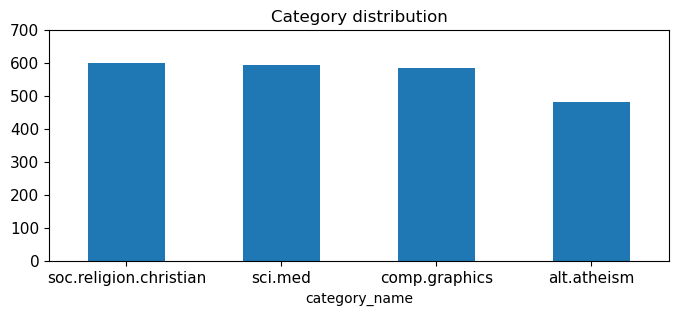

In [71]:
print(X.category_name.value_counts())

# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 700],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

category_name
sci.med                   277
soc.religion.christian    270
comp.graphics             247
alt.atheism               206
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

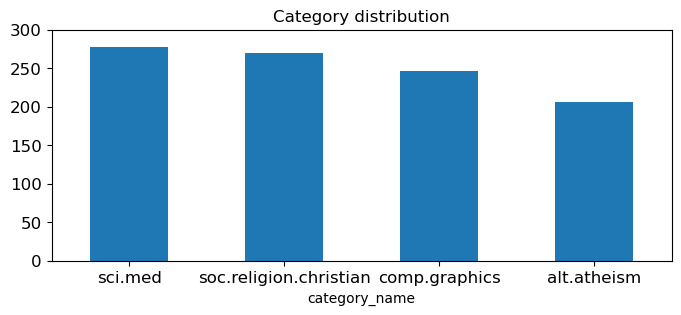

In [72]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

277
category_name
sci.med                   277
soc.religion.christian    270
comp.graphics             247
alt.atheism               206
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

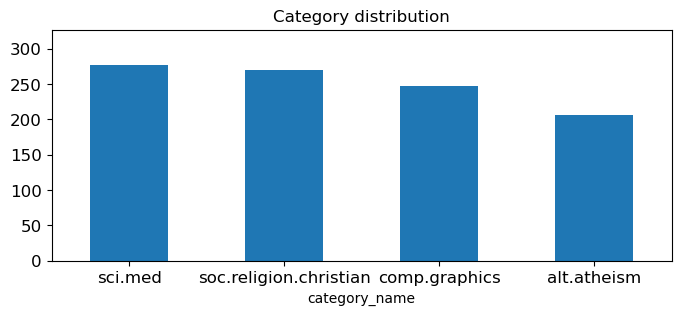

In [73]:
##EXERCISE  7
# Answer here

# plot barchart for X_sample
print(max(X_sample.category_name.value_counts()))
upper_bound = max(X_sample.category_name.value_counts() + 50) #277 + 50
print(X_sample.category_name.value_counts())

X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

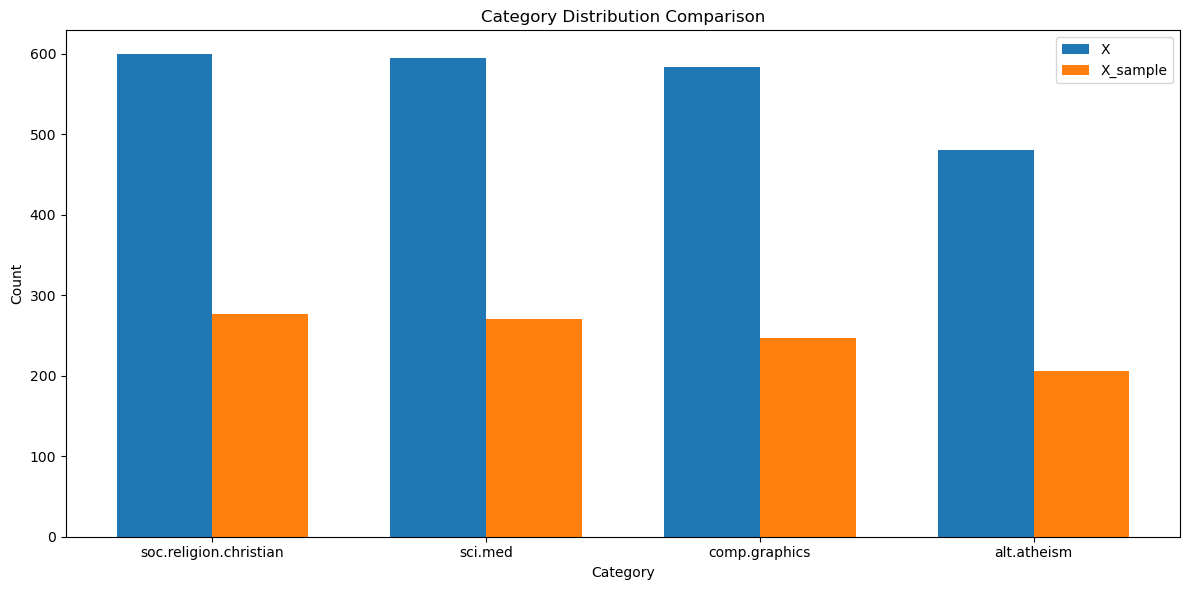

In [74]:
##EXERCISE  8
###ANSWER
import matplotlib.pyplot as plt
%matplotlib inline

# Get value counts for 'category_name' in both datasets
X_category_counts = X.category_name.value_counts()
X_sample_category_counts = X_sample.category_name.value_counts()

# Categories
categories = X_category_counts.index
x = range(len(categories))

# Bar width
bar_width = 0.35

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bar chart for X
ax.bar([i - bar_width/2 for i in x], X_category_counts.values, bar_width, label='X')
ax.bar([i + bar_width/2 for i in x], X_sample_category_counts.values, bar_width, label='X_sample')

ax.set_title('Category Distribution Comparison')
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Display the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [75]:
###5.2 Feature Creation

In [76]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\picik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [77]:
'''
LookupError: 
**********************************************************************
  Resource punkt not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt')
'''
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [78]:
X[0:4]["unigrams"]


0    [From, :, sd345, @, city.ac.uk, (, Michael, Co...
1    [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....
2    [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...
3    [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...
Name: unigrams, dtype: object

In [79]:
X[0:4]


text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   

            category_name                                           unigrams  
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...  
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....  
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...  
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...

In [80]:
list(X[0:1]['unigrams'])


[['From',
  ':',
  'sd345',
  '@',
  'city.ac.uk',
  '(',
  'Michael',
  'Collier',
  ')',
  'Subject',
  ':',
  'Converting',
  'images',
  'to',
  'HP',
  'LaserJet',
  'III',
  '?',
  'Nntp-Posting-Host',
  ':',
  'hampton',
  'Organization',
  ':',
  'The',
  'City',
  'University',
  'Lines',
  ':',
  '14',
  'Does',
  'anyone',
  'know',
  'of',
  'a',
  'good',
  'way',
  '(',
  'standard',
  'PC',
  'application/PD',
  'utility',
  ')',
  'to',
  'convert',
  'tif/img/tga',
  'files',
  'into',
  'LaserJet',
  'III',
  'format',
  '.',
  'We',
  'would',
  'also',
  'like',
  'to',
  'do',
  'the',
  'same',
  ',',
  'converting',
  'to',
  'HPGL',
  '(',
  'HP',
  'plotter',
  ')',
  'files',
  '.',
  'Please',
  'email',
  'any',
  'response',
  '.',
  'Is',
  'this',
  'the',
  'correct',
  'group',
  '?',
  'Thanks',
  'in',
  'advance',
  '.',
  'Michael',
  '.',
  '--',
  'Michael',
  'Collier',
  '(',
  'Programmer',
  ')',
  'The',
  'Computer',
  'Unit',
  ',',
  'Emai

In [81]:
#############5.3 Feature subset selection

In [82]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts.shape)
print(X_counts[0])

(2257, 35788)
  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (0, 25361)	1
  (0, 25337)	1
  (0, 12833)	2
  (0, 5195)	1
  (0, 27836)	1
  (0, 18474)	1
  (0, 32270)	1
  (0, 9932)	1
  (0, 15837)	1
  (0, 32135)	1
  (0, 17556)	1
  (0, 4378)	1
  (0, 26175)	1
  (0, 9338)	1
  (0, 33572)	1
  (0, 31915)	1
  (0, 177)	2
  (0, 2326)	2
  (0, 3062)	1
  (0, 35416)	1
  (0, 20459)	1
  (0, 14085)	1
  (0, 3166)	1
  (0, 12541)	1
  (0, 230)	1


In [83]:
count_vect.get_feature_names_out()[14887]


'from'

In [84]:
count_vect.get_feature_names_out()[29022]


'sd345'

In [85]:
count_vect.get_feature_names_out()[8696]


'city'

In [86]:
count_vect.get_feature_names_out()[4017]


'ac'

In [87]:
analyze = count_vect.build_analyzer()
analyze(X.text[0])

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

In [88]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

In [89]:
##Exercise 9 
##ANSWER
#To turn a text document (in your case, the text of the first record from your DataFrame) into a tokenized text using the build_analyzer() function you have created, you simply call the analyze function with the text as input. Here's how you can do it:
#Assuming you have already built the analyze function using count_vect.build_analyzer(), you can tokenize the text of the first record as follows:


# Apply the custom analyzer to the text of the first record
first_record_text = X.text[0]
# Tokenize the text using the analyze function
tokenized_text = analyze(first_record_text)

# Print the tokenized text
print(tokenized_text)


['from', 'sd345', 'city', 'ac', 'uk', 'michael', 'collier', 'subject', 'converting', 'images', 'to', 'hp', 'laserjet', 'iii', 'nntp', 'posting', 'host', 'hampton', 'organization', 'the', 'city', 'university', 'lines', '14', 'does', 'anyone', 'know', 'of', 'good', 'way', 'standard', 'pc', 'application', 'pd', 'utility', 'to', 'convert', 'tif', 'img', 'tga', 'files', 'into', 'laserjet', 'iii', 'format', 'we', 'would', 'also', 'like', 'to', 'do', 'the', 'same', 'converting', 'to', 'hpgl', 'hp', 'plotter', 'files', 'please', 'email', 'any', 'response', 'is', 'this', 'the', 'correct', 'group', 'thanks', 'in', 'advance', 'michael', 'michael', 'collier', 'programmer', 'the', 'computer', 'unit', 'email', 'collier', 'uk', 'ac', 'city', 'the', 'city', 'university', 'tel', '071', '477', '8000', 'x3769', 'london', 'fax', '071', '477', '8565', 'ec1v', '0hb']


In [90]:
###AA
analyze(X.text[0])

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

In [91]:
analyze(" ".join(list(X[:1].text)))

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

In [92]:
# We can check the shape of this matrix by:
X_counts.shape

(2257, 35788)

In [93]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '0000', '0000001200', '000005102000', '0001',
       '000100255pixel', '00014', '000406', '0007'], dtype=object)

In [94]:
X_counts.shape

(2257, 35788)

In [95]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [96]:
count_vect.get_feature_names_out()[0:1]


array(['00'], dtype=object)

In [97]:
##Exercise 10 
#ANSWER
import time

# Record the start time
start_time = time.time()

row_index = 4  # Fifth record (0-based index)
# Find all indices of '1' in the row
indices = np.where(X_counts[row_index].toarray() == 1)[1]

# Initialize a counter for '1's
count = 0

# Iterate through the indices
for column_index in indices:
    # Get the word from the vocabulary
    word = count_vect.get_feature_names_out()[column_index]
    print(f"The word represented by the '1' at index {column_index} is: {word}")
    
    # Increment the count
    count += 1
    
    # Check if two '1's have been encountered
    if count == 2:
        break  # Exit the loop after encountering two '1's

# Record the end time
end_time = time.time()

# Calculate and print the running time
running_time = end_time - start_time
print("Running time:", running_time, "seconds")


The word represented by the '1' at index 0 is: 00
The word represented by the '1' at index 37 is: 01
Running time: 0.0223386287689209 seconds


In [98]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
print(plot_x)

['term_00', 'term_000', 'term_0000', 'term_0000001200', 'term_000005102000', 'term_0001', 'term_000100255pixel', 'term_00014', 'term_000406', 'term_0007', 'term_000usd', 'term_0010', 'term_001004', 'term_0010580b', 'term_001125', 'term_001200201pixel', 'term_0014', 'term_001642', 'term_00196', 'term_002']


In [99]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
print(plot_y)

['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19']


In [100]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
print(plot_z)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


term_00  term_000  term_0000  term_0000001200  term_000005102000  \
doc_0         0         0          0                0                  0   
doc_1         0         0          0                0                  0   
doc_2         0         0          0                0                  0   
doc_3         0         0          0                0                  0   
doc_4         1         0          0                0                  0   
doc_5         1         0          0                0                  0   
doc_6         0         0          0                0                  0   
doc_7         0         0          0                0                  0   
doc_8         0         0          0                0                  0   
doc_9         0         0          0                0                  0   
doc_10        0         0          0                0                  0   
doc_11        0         0          0                0                  0   
doc_12        0         0          0                0                  0   
doc_13        0         0          0                0                  0   
doc_14        0         0          0                0                  0   
doc_15        0         0          0                0                  0   
doc_16        0         0          0                0                  0   
doc_17        0         0          0                0                  0   
doc_18        0         0          0                0                  0   
doc_19        0         0          0                0                  0   

        term_0001  term_000100255pixel  term_00014  term_000406  term_0007  \
doc_0           0                    0           0            0          0   
doc_1           0                    0           0            0          0   
doc_2           0                    0           0            0          0   
doc_3           0                    0           0            0          0   
doc_4           0                    0           0            0          0   
doc_5           0                    0           0            0          0   
doc_6           0                    0           0            0          0   
doc_7           0                    0           0            0          0   
doc_8           0                    0           0            0          0   
doc_9           0                    0           0            0          0   
doc_10          0                    0           0            0          0   
doc_11          0                    0           0            0          0   
doc_12          0                    0           0            0          0   
doc_13          0                    0           0            0          0   
doc_14          0                    0           0            0          0   
doc_15          0                    0           0            0          0   
doc_16          0                    0           0            0          0   
doc_17          0                    0           0            0          0   
doc_18          0                    0           0            0          0   
doc_19          0                    0           0            0          0   

        term_000usd  term_0010  term_001004  term_0010580b  term_001125  \
doc_0             0          0            0              0            0   
doc_1             0          0            0              0            0   
doc_2             0          0            0              0            0   
doc_3             0          0            0              0            0   
doc_4             0          0            0              0            0   
doc_5             0          0            0              0            0   
doc_6             0          0            0              0            0   
doc_7             0          0            0              0            0   
doc_8             0          0            0              0            0   
doc_9             0   

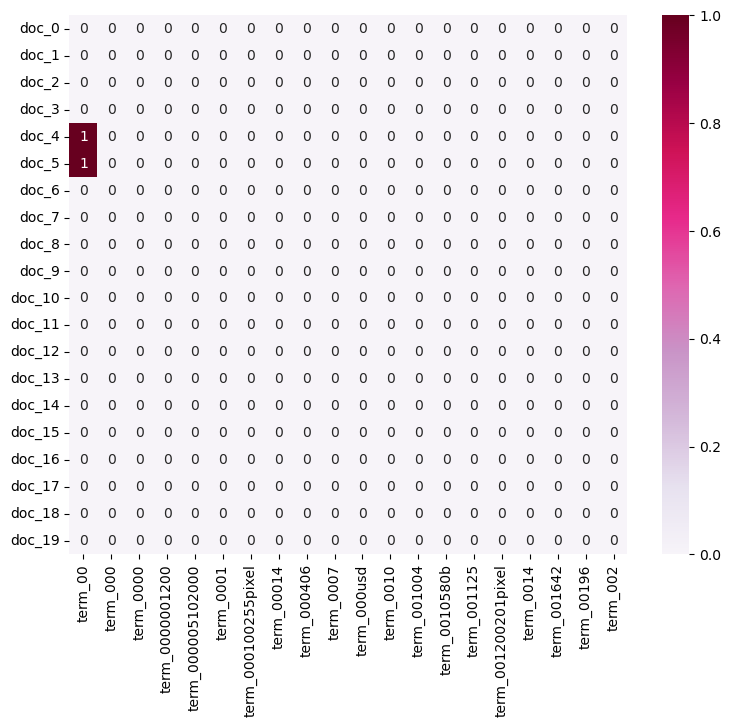

In [101]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

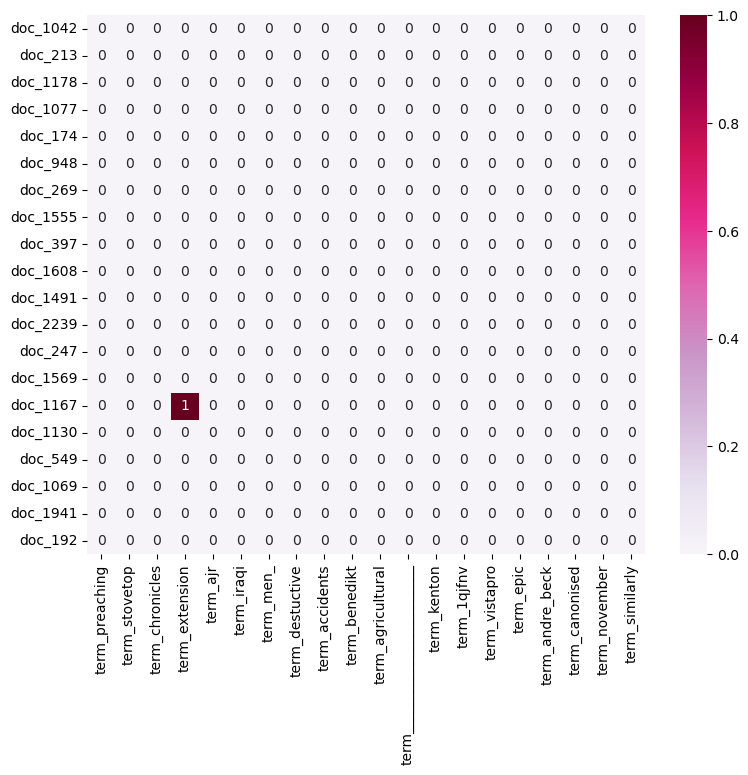

In [102]:
##Exercise 11
##ANSWER
import random

# Randomly select a sample of terms and documents
sample_size = 20
sample_terms = random.sample(list(count_vect.get_feature_names_out()), sample_size)
sample_documents = random.sample(list(X.index), sample_size)

# Get the corresponding submatrix
sample_X_counts = X_counts[sample_documents, :][:, [count_vect.vocabulary_[term] for term in sample_terms]]

# Create a DataFrame for visualization
plot_x = ["term_" + term for term in sample_terms]
plot_y = ["doc_" + str(doc) for doc in sample_documents]
plot_z = sample_X_counts.toarray()

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

# Create a heatmap using seaborn
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True)
plt.show()
 
    #REPORT
#A heatmap visualization of a submatrix of term-document using the seaborn library. 

In [103]:
# 5.4 Dimensionality Reduction

In [104]:
from sklearn.decomposition import PCA


In [105]:
print(X_counts.shape)
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
print(X_reduced.shape)

(2257, 35788)
(2257, 2)


In [106]:
X_reduced.shape


(2257, 2)

In [107]:
categories


Index(['soc.religion.christian', 'sci.med', 'comp.graphics', 'alt.atheism'], dtype='object', name='category_name')

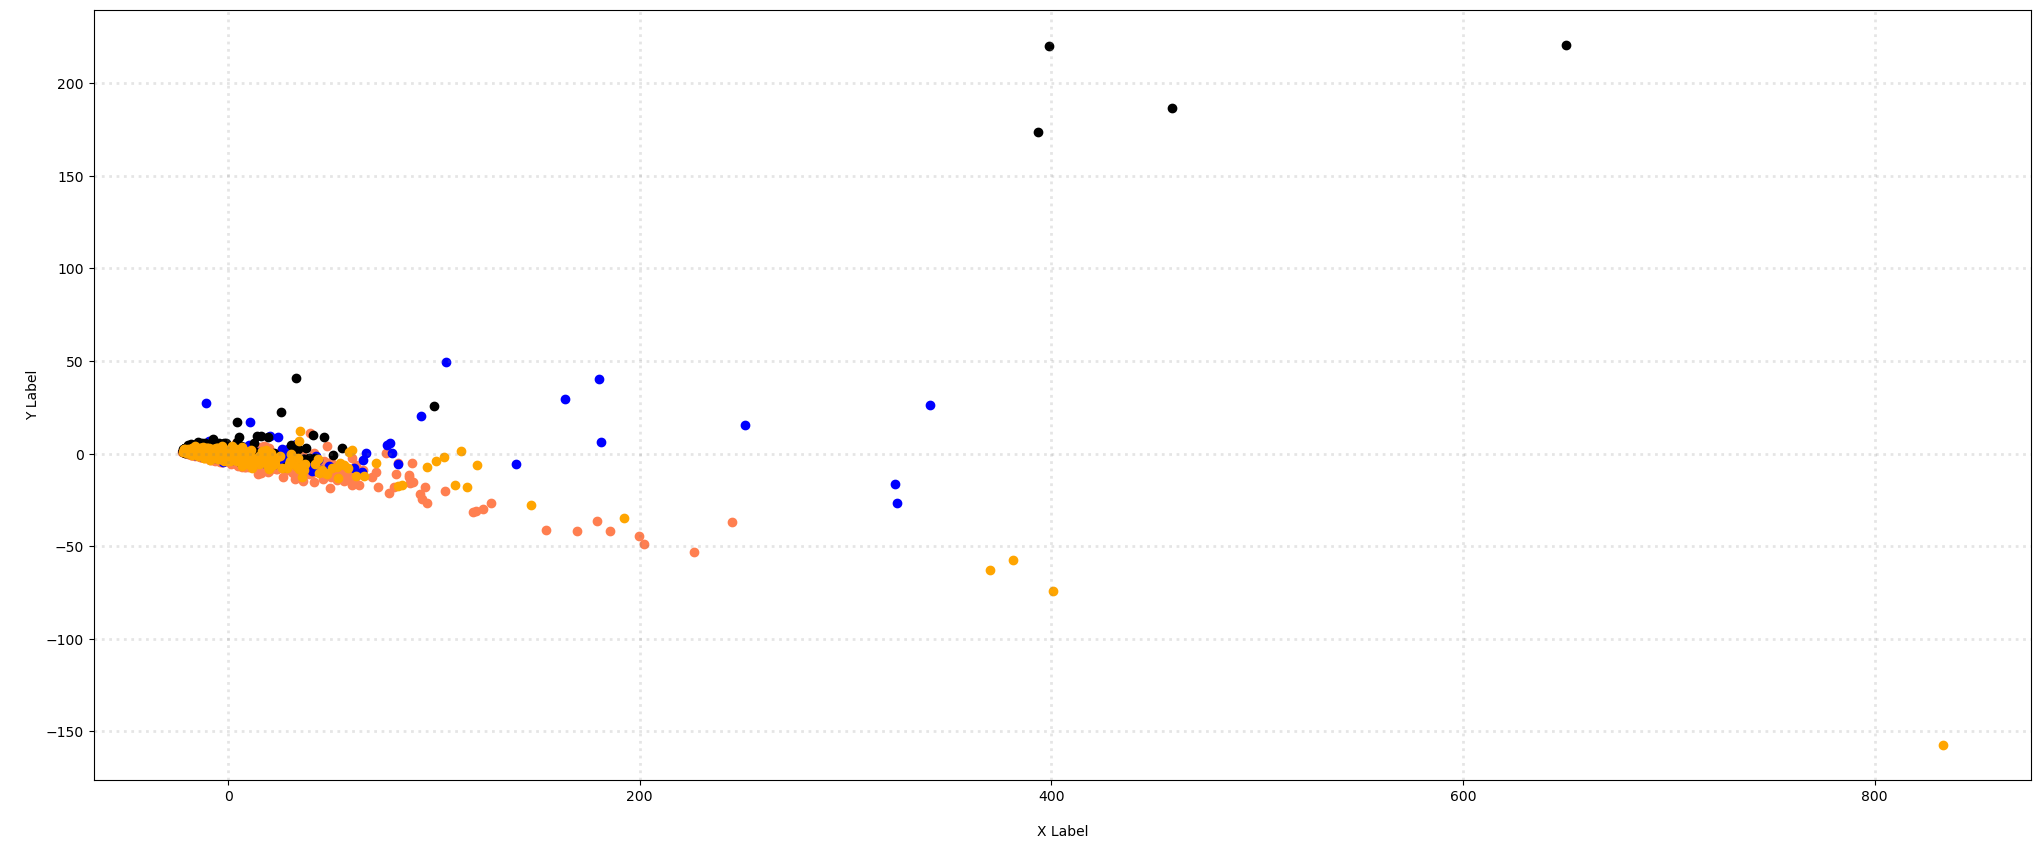

In [108]:
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

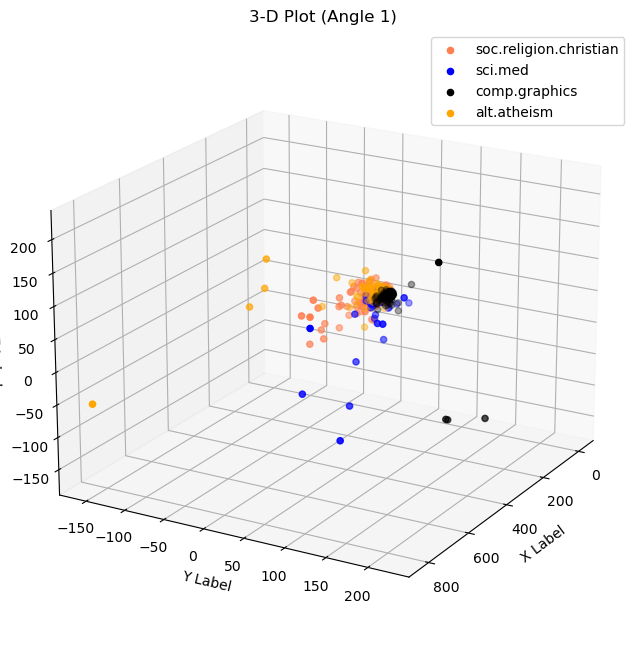

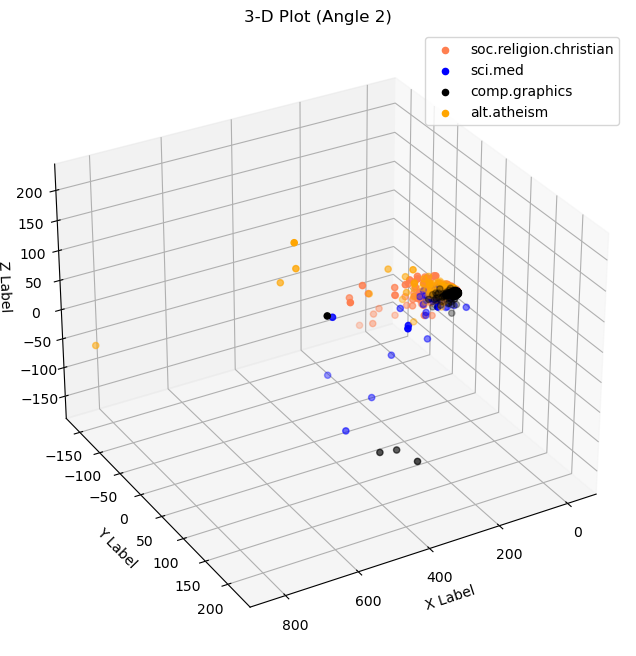

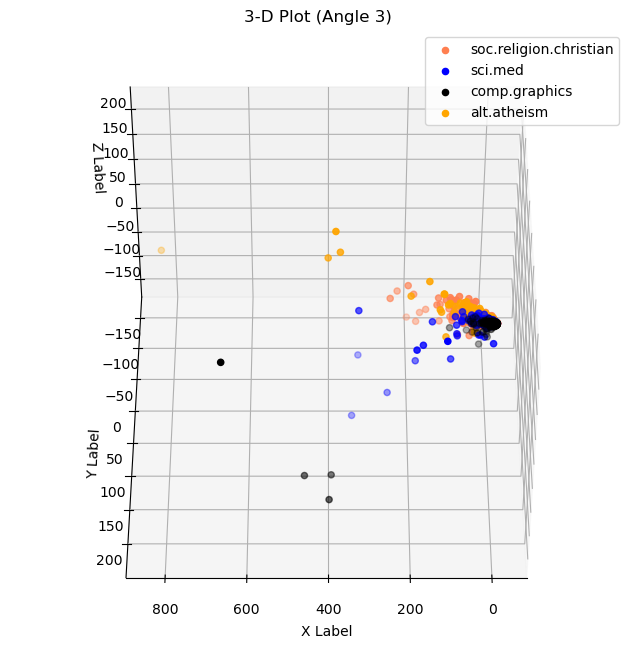

In [109]:
###Exercise 12
##ANSWER
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Reduce dimensionality to 3
X_reduced_3d = PCA(n_components=3).fit_transform(X_counts.toarray())

# Create a 3-D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced_3d[X['category_name'] == category].T[0]
    ys = X_reduced_3d[X['category_name'] == category].T[1]
    zs = X_reduced_3d[X['category_name'] == category].T[2]

    ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Set different camera positions (angles)
ax.view_init(elev=20, azim=30)  # Angle 1
plt.title('3-D Plot (Angle 1)')
plt.legend()
plt.show()

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced_3d[X['category_name'] == category].T[0]
    ys = X_reduced_3d[X['category_name'] == category].T[1]
    zs = X_reduced_3d[X['category_name'] == category].T[2]

    ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Set different camera positions (angles)
ax.view_init(elev=30, azim=60)  # Angle 2
plt.title('3-D Plot (Angle 2)')
plt.legend()
plt.show()

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced_3d[X['category_name'] == category].T[0]
    ys = X_reduced_3d[X['category_name'] == category].T[1]
    zs = X_reduced_3d[X['category_name'] == category].T[2]

    ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Set different camera positions (angles)
ax.view_init(elev=45, azim=90)  # Angle 3
plt.title('3-D Plot (Angle 3)')
plt.legend()
plt.show()


In [110]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
print(X_counts.shape[1])
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

35788


In [111]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [112]:
term_frequencies[0] #sum of first term: 00


134

C:\Users\picik\anaconda3\envs\datamining\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\picik\anaconda3\envs\datamining\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\picik\anaconda3\envs\datamining\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


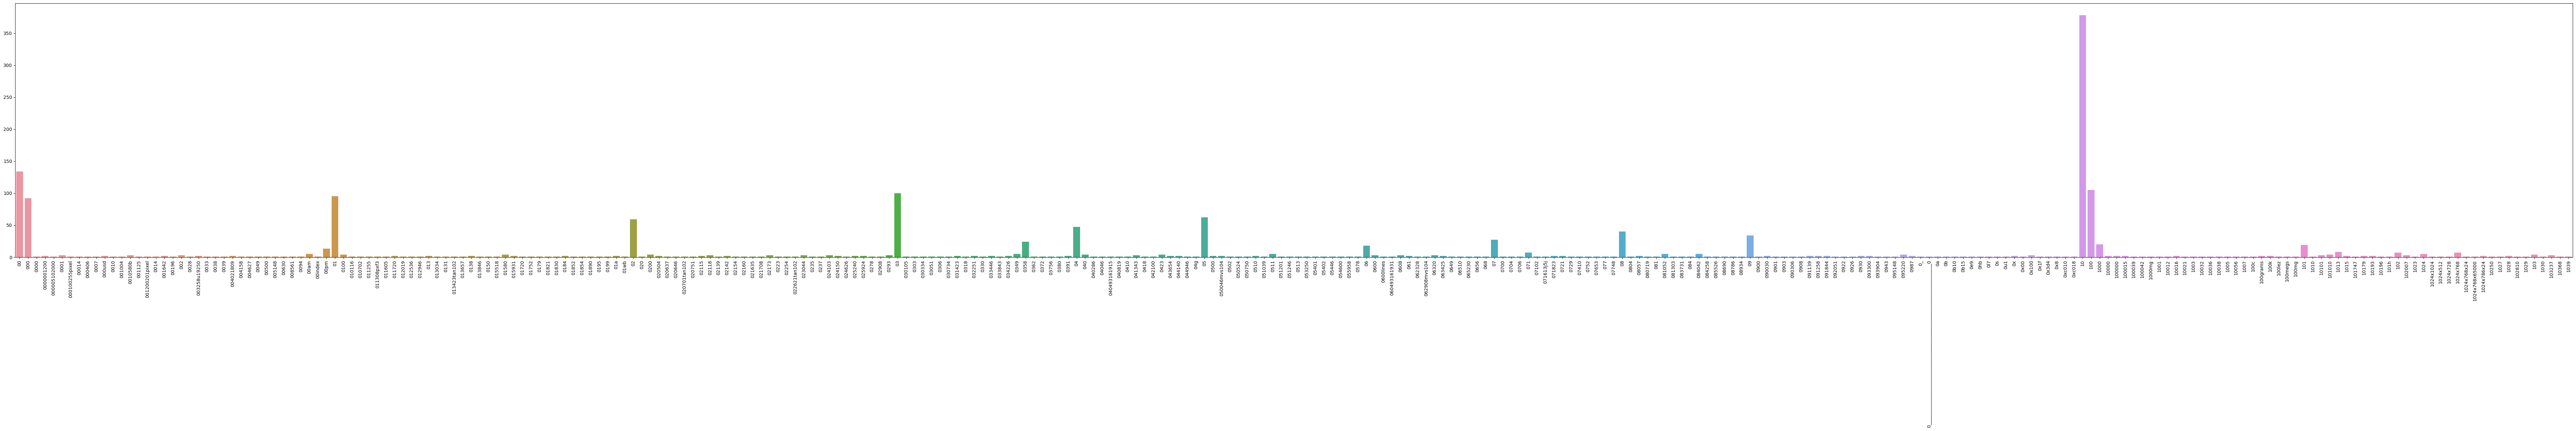

In [113]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [114]:
### Exercise 13 
### ANSWER
import plotly.express as px

# Create a DataFrame for the term frequencies and corresponding terms
term_frequency_df = pd.DataFrame({
    'Term': count_vect.get_feature_names_out()[:300],
    'Frequency': term_frequencies[:300]
})

# Create an interactive bar plot with Plotly
fig = px.bar(
    term_frequency_df,
    x='Term',
    y='Frequency',
    title='Term Frequencies',
    labels={'Frequency': 'Term Frequency'},
    text='Frequency'
)

# Customize the layout
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_xaxes(categoryorder='total descending')
fig.update_layout(xaxis_title='Term', yaxis_title='Frequency', xaxis_tickangle=-45)

# Show the interactive plot
fig.show()


In [115]:
######Exercise 14
##ANSWER
#
import plotly.express as px

# Create a DataFrame for the term frequencies and corresponding terms
term_frequency_df = pd.DataFrame({
    'Term': count_vect.get_feature_names_out()[:30],
    'Frequency': term_frequencies[:30]
})

# Create an interactive bar plot with Plotly
fig = px.bar(
    term_frequency_df,
    x='Term',
    y='Frequency',
    title='Term Frequencies',
    labels={'Frequency': 'Term Frequency'},
    text='Frequency'
)

# Customize the layout
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_xaxes(categoryorder='total descending')
fig.update_layout(xaxis_title='Term', yaxis_title='Frequency', xaxis_tickangle=-45)

# Show the interactive plot
fig.show()

In [117]:
##Exercise 15
##ANSWER
#Sorting the terms on the x-axis by frequency instead of in alphabetical order.
# Sort terms by frequency and select the top N terms
sorted_indices = np.argsort(term_frequencies)[::-1]  
top_terms_count = 50
# Sort in descending order
top_term_indices = sorted_indices[:top_terms_count]
top_term_frequencies = term_frequencies[top_term_indices]
top_terms = [count_vect.get_feature_names_out()[i] for i in top_term_indices]

# Create a DataFrame for the top terms and their frequencies
top_term_frequency_df = pd.DataFrame({
    'Term': top_terms,
    'Frequency': top_term_frequencies
})

# Sort the DataFrame by term frequency in descending order
top_term_frequency_df = top_term_frequency_df.sort_values(by='Frequency', ascending=False)

# Create a bar plot with the top terms using Plotly
fig = px.bar(
    top_term_frequency_df,
    x='Term',
    y='Frequency',
    title=f'Top {top_terms_count} Term Frequencies',
    labels={'Frequency': 'Term Frequency'},
    text='Frequency'
)

# Customize the layout
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_xaxes(categoryorder='total descending')
fig.update_layout(xaxis_title='Term', yaxis_title='Frequency', xaxis_tickangle=-45)

# Show the interactive plot
fig.show()


In [118]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

C:\Users\picik\anaconda3\envs\datamining\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\picik\anaconda3\envs\datamining\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\picik\anaconda3\envs\datamining\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '0000'),
 Text(3, 0, '0000001200'),
 Text(4, 0, '000005102000'),
 Text(5, 0, '0001'),
 Text(6, 0, '000100255pixel'),
 Text(7, 0, '00014'),
 Text(8, 0, '000406'),
 Text(9, 0, '0007'),
 Text(10, 0, '000usd'),
 Text(11, 0, '0010'),
 Text(12, 0, '001004'),
 Text(13, 0, '0010580b'),
 Text(14, 0, '001125'),
 Text(15, 0, '001200201pixel'),
 Text(16, 0, '0014'),
 Text(17, 0, '001642'),
 Text(18, 0, '00196'),
 Text(19, 0, '002'),
 Text(20, 0, '0028'),
 Text(21, 0, '003258u19250'),
 Text(22, 0, '0033'),
 Text(23, 0, '0038'),
 Text(24, 0, '0039'),
 Text(25, 0, '004021809'),
 Text(26, 0, '004158'),
 Text(27, 0, '004627'),
 Text(28, 0, '0049'),
 Text(29, 0, '00500'),
 Text(30, 0, '005148'),
 Text(31, 0, '00630'),
 Text(32, 0, '008561'),
 Text(33, 0, '0094'),
 Text(34, 0, '00am'),
 Text(35, 0, '00index'),
 Text(36, 0, '00pm'),
 Text(37, 0, '01'),
 Text(38, 0, '0100'),
 Text(39, 0, '010116'),
 Text(40, 0, '010702'),
 Text(41, 0, '011255'),
 Text(42, 

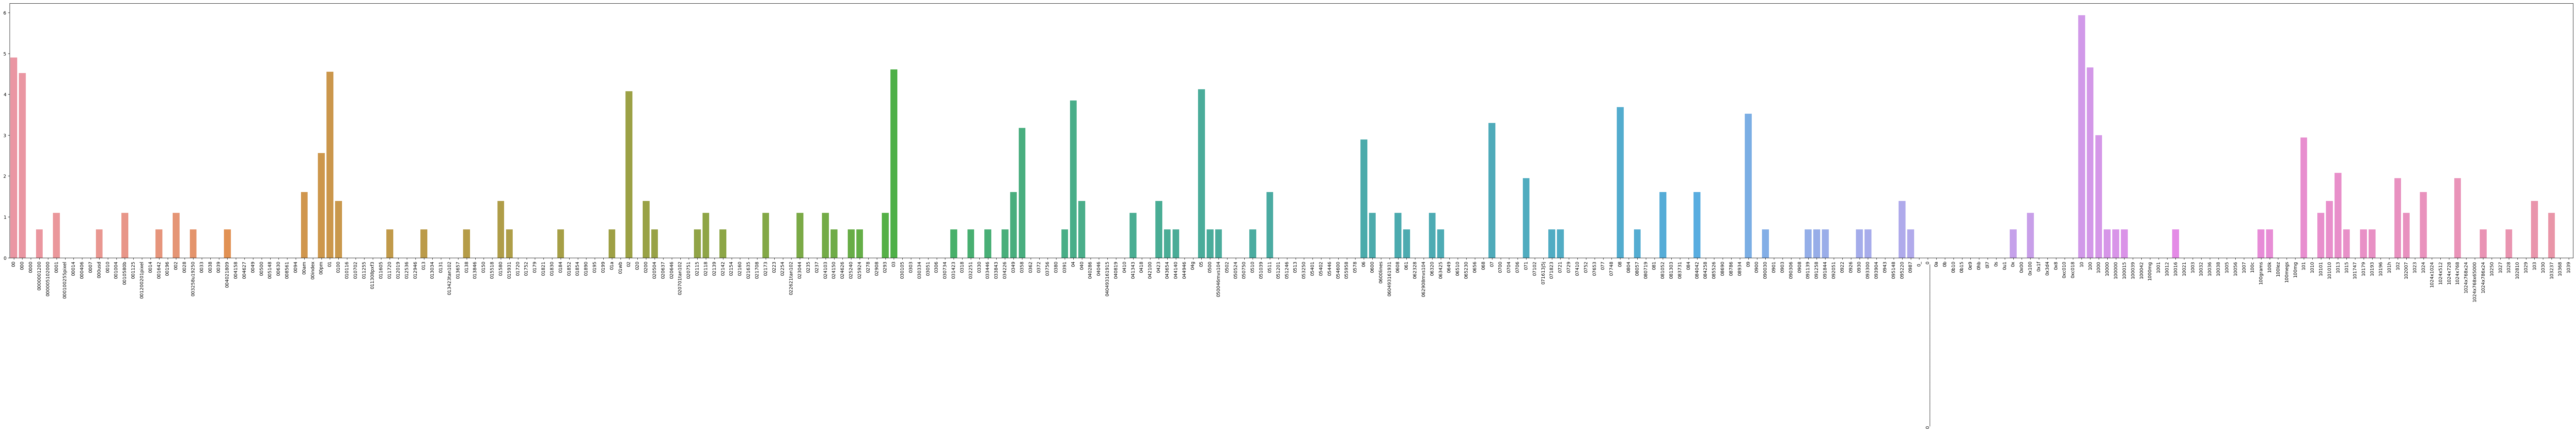

In [119]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

In [120]:
#### 5.6 Discretization and Binarization

In [121]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy


In [122]:
mlb = preprocessing.LabelBinarizer()


In [123]:
mlb.fit(X.category)


LabelBinarizer()

In [124]:
X['bin_category'] = mlb.transform(X['category']).tolist()


In [125]:
X[0:9]


text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   

   bin_category  
0  [0, 1, 0, 0]  
1  [0, 1, 0, 0]  
2  [0, 0, 0, 1]  
3  [0, 0, 0, 1]  
4  [0, 0, 0, 1]  
5  [0, 0, 0, 1]  
6  [0, 0, 0, 1]  
7  [0, 0, 1, 0]  
8  [0, 0, 1, 0]

In [126]:
## Exercise 16
##ANSWER: Yes it work
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]


text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   

   bin_category bin_category_name  
0  [0, 1, 0, 0]      [0, 1, 0, 0]  
1  [0, 1, 0, 0]      [0, 1, 0, 0]  
2  [0, 0, 0, 1]      [0, 0, 0, 1]  
3  [0, 0, 0, 1]      [0, 0, 0, 1]  
4  [0, 0, 0, 1]      [0, 0, 0, 1]  
5  [0, 0, 0, 1]      [0, 0, 0, 1]  
6  [0, 0, 0, 1]      [0, 0, 0, 1]  
7  [0, 0, 1, 0]      [0, 0, 1, 0]  
8  [0, 0, 1, 0]      [0, 0, 1, 0]

In [127]:
####Data Exploration

In [128]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [129]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['From: ab@nova.cc.purdue.edu (Allen B) Subject: Re: TIFF: philosophical significance of 42 Organization: Purdue University Lines: 39  In article <prestonm.735400848@cs.man.ac.uk> prestonm@cs.man.ac.uk (Martin   Preston) writes: > Why not use the PD C library for reading/writing TIFF files? It took me a > good 20 minutes to start using them in your own app.  I certainly do use it whenever I have to do TIFF, and it usually works very well.  That\'s not my point.  I\'m >philosophically< opposed to it because of its complexity.  This complexity has led to some programs\' poor TIFF writers making some very bizarre files, other programs\' inability to load TIFF images (though they\'ll save them, of course), and a general inability to interchange images between different environments despite the fact they all think they understand TIFF.  As the saying goes, "It\'s not me I\'m worried about- it\'s all the >other<  assholes out there!"  I\'ve had big trouble with misuse and abuse of TIFF over 

In [130]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [131]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.608862
Cosine Similarity using count bw 1 and 3: 0.622050
Cosine Similarity using count bw 2 and 3: 0.565566
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\picik\AppData\Local\Temp\ipykernel_9224\452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\picik\AppData\Local\Temp\ipykernel_9224\452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\picik\AppData\Local\Temp\ipykernel_9224\452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\picik\AppData\Local\Temp\ipykernel_9224\452772485.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a scal